In [3]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

/tmp/ipykernel_775931/2026922495.py:6: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


In [11]:
def build_and_train_model(x, y):
    ANNreg = nn.Sequential(
        nn.Linear(1, 1),
        nn.ReLU(),
        nn.Linear(1, 1)
    )

    ## loss func
    lossfunc = nn.MSELoss()
    optimizer = torch.optim.SGD(ANNreg.parameters(), lr=0.05)

    # train model
    epochs = 50
    losses = np.zeros(epochs)
    for epoch in range(epochs):
        # forward
        y_pred = ANNreg(x)

        # loss
        loss = lossfunc(y_pred, y)
        losses[epoch] = loss

        # backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    predictions = ANNreg(x)
    return predictions, losses

In [12]:
def create_data(m):
    N = 50
    x = torch.randn(N, 1)
    y = m*x + torch.randn(N, 1)/2
    return x, y

losses[::3]=array([0.56697839, 0.50897413, 0.46533316, 0.43192318, 0.4060756 ,
       0.38597992, 0.37031186, 0.35804999, 0.3483929 , 0.34071469,
       0.33453324, 0.32948247, 0.32528785, 0.32174543, 0.31870469,
       0.31605485, 0.31369704])


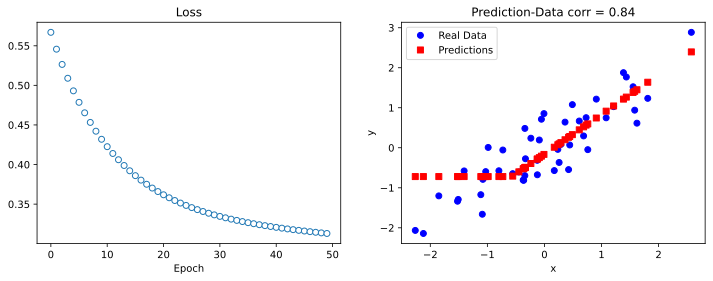

In [17]:
## testing

x, y = create_data(.8)

y_pred, losses = build_and_train_model(x, y)
print(f'{losses[::3]=}')
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].plot(losses, 'o', markerfacecolor='w', linewidth=.1)
ax[0].set_xlabel('Epoch')
ax[0].set_title('Loss')

ax[1].plot(x, y, 'bo', label='Real Data')
ax[1].plot(x, y_pred.detach(), 'rs', label='Predictions')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].set_title(f'Prediction-Data corr = {np.corrcoef(y.T, y_pred.detach().T)[0,1]:.2f}')
ax[1].legend()
plt.show()

In [20]:
# the slopes to simulate
slopes = np.linspace(-2, 2, 21)

numExp = 50

results = np.zeros((len(slopes), numExp, 2))

for slopei in range(len(slopes)):
    print(f'Running {slopei=}...')
    for exp_id in range(numExp):
        x, y = create_data(slopes[slopei])
        y_pred, losses = build_and_train_model(x, y)

        # store final loss and performance
        results[slopei, exp_id, 0] = losses[-1]
        results[slopei, exp_id, 1] = np.corrcoef(y.T, y_pred.detach().T)[0,1]

results[np.isnan(results)] = 0


Running slopei=0...


/home/shravan/miniconda3/envs/pytorch/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/shravan/miniconda3/envs/pytorch/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Running slopei=1...
Running slopei=2...
Running slopei=3...
Running slopei=4...
Running slopei=5...
Running slopei=6...
Running slopei=7...
Running slopei=8...
Running slopei=9...
Running slopei=10...
Running slopei=11...
Running slopei=12...
Running slopei=13...
Running slopei=14...
Running slopei=15...
Running slopei=16...
Running slopei=17...
Running slopei=18...
Running slopei=19...
Running slopei=20...


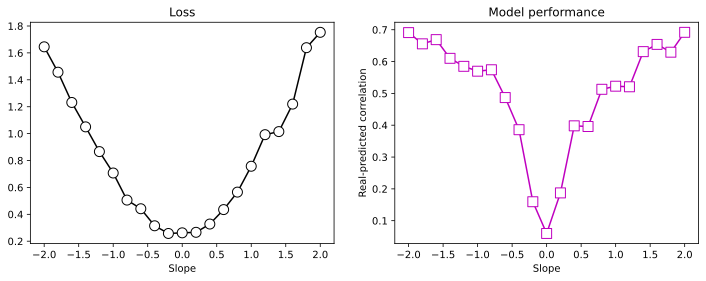

In [22]:
# plot the results!

fig,ax = plt.subplots(1,2,figsize=(12,4))

ax[0].plot(slopes,np.mean(results[:,:,0],axis=1),'ko-',markerfacecolor='w',markersize=10)
ax[0].set_xlabel('Slope')
ax[0].set_title('Loss')

ax[1].plot(slopes,np.mean(results[:,:,1],axis=1),'ms-',markerfacecolor='w',markersize=10)
ax[1].set_xlabel('Slope')
ax[1].set_ylabel('Real-predicted correlation')
ax[1].set_title('Model performance')

plt.show()